In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils as utils
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.set_option("display.max_rows", None)
from pandas_profiling import ProfileReport

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
games, season_games, teams, seasons, rankings, games_matchup = utils.load_df()

In [3]:
home_team_id = 1610612757
visitor_team_id = 1610612758
season_year = 2018
games[games.SEASON.eq(season_year)  &((games.HOME_TEAM_ID == home_team_id) |
             (games.VISITOR_TEAM_ID == home_team_id))
              ]

GAME_DATE_EST GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
GAME_ID                                                                  
11800003 2018-09-29     Final            1610612761    1610612757        
11800038 2018-10-05     Final            1610612756    1610612757        
11800046 2018-10-07     Final            1610612757    1610612762        
11800064 2018-10-10     Final            1610612757    1610612756        
11800078 2018-10-12     Final            1610612757    1610612758        
...             ...       ...                   ...           ...        
41800237 2019-05-12     Final            1610612743    1610612757        
41800311 2019-05-14     Final            1610612744    1610612757        
41800312 2019-05-16     Final            1610612744    1610612757        
41800313 2019-05-18     Final            1610612757    1610612744        
41800314 2019-05-20     Final            1610612757    1610612744        

          SEASON  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  \
GAME_ID                                                                        
11800003  2018    122.0     0.415        0.824        0.343         15.0       
11800038  2018    93.0      0.388        0.800        0.344         20.0       
11800046  2018    112.0     0.519        0.850        0.406         23.0       
11800064  2018    116.0     0.478        0.714        0.469         25.0       
11800078  2018    118.0     0.448        0.828        0.421         28.0       
...        ...      ...       ...          ...          ...          ...       
41800237  2018    96.0      0.371        0.718        0.105         15.0       
41800311  2018    116.0     0.500        0.833        0.515         30.0       
41800312  2018    114.0     0.512        0.778        0.310         30.0       
41800313  2018    99.0      0.400        0.606        0.314         22.0       
41800314  2018    117.0     0.480        0.700        0.390         31.0       

          REB_home  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
GAME_ID                                                                
11800003  45.0      104.0     0.420        0.720        0.387          
11800038  44.0      115.0     0.457        0.872        0.350          
11800046  41.0      123.0     0.471        0.852        0.500          
11800064  47.0      83.0      0.386        0.611        0.258          
11800078  48.0      115.0     0.422        0.879        0.417          
...        ...       ...        ...          ...          ...          
41800237  51.0      100.0     0.409        0.833        0.154          
41800311  42.0      94.0      0.361        0.871        0.250          
41800312  50.0      111.0     0.442        0.944        0.462          
41800313  41.0      110.0     0.488        0.870        0.308          
41800314  38.0      119.0     0.465        0.789        0.308          

          AST_away  REB_away  HOME_TEAM_WINS HOME_TEAM_NAME VISITOR_TEAM_NAME  
GAME_ID                                                                        
11800003  25.0      46.0      1               TOR            POR               
11800038  26.0      44.0      0               PHX            POR               
11800046  25.0      35.0      0               POR            UTA               
11800064  18.0      42.0      1               POR            PHX               
11800078  22.0      37.0      1               POR            SAC               
...        ...       ...     ..               ...            ...               
41800237  16.0      55.0      0               DEN            POR               
41800311  21.0      47.0      1               GSW            POR               
41800312  23.0      37.0      1               GSW            POR               
41800313  27.0      49.0      0               POR            GSW               
41800314  30.0      56.0      0               POR            GSW               

[103 rows x 20 columns]

In [4]:
df = games_matchup[games_matchup.SEASON >= 2008]
df

GAME_DATE_EST HOME_TEAM_NAME  HOME_TEAM_ID VISITOR_TEAM_NAME  \
GAME_ID                                                                 
20800001 2008-10-28     BOS            1610612738    CLE                
20800002 2008-10-28     CHI            1610612741    MIL                
20800003 2008-10-28     LAL            1610612747    POR                
20800004 2008-10-29     ORL            1610612753    ATL                
20800005 2008-10-29     PHI            1610612755    TOR                
...             ...     ...                   ...    ...                
21801226 2019-04-10     MIL            1610612749    OKC                
21801227 2019-04-10     SAS            1610612759    DAL                
21801228 2019-04-10     DEN            1610612743    MIN                
21801229 2019-04-10     LAC            1610612746    UTA                
21801230 2019-04-10     POR            1610612757    SAC                

          VISITOR_TEAM_ID GAME_STATUS_TEXT  SEASON  HT_RANK  HT_CLASS  HT_HW  \
GAME_ID                                                                        
20800001  1610612739       Final            2008    29       2         35      
20800002  1610612749       Final            2008    27       2         20      
20800003  1610612757       Final            2008    28       2         30      
20800004  1610612737       Final            2008    15       1         25      
20800005  1610612761       Final            2008    9        0         22      
...              ...         ...             ...    ..      ..         ..      
21801226  1610612760       Final            2018    29       2         33      
21801227  1610612742       Final            2018    19       1         31      
21801228  1610612750       Final            2018    26       2         33      
21801229  1610612762       Final            2018    17       1         25      
21801230  1610612758       Final            2018    24       2         31      

          HT_HL  HT_VW  HT_VL  HT_LAST10_W  HT_LAST10_L  HT_LAST10_MATCHUP_W  \
GAME_ID                                                                        
20800001  6      31     10     9            1            3                     
20800002  21     13     28     5            5            8                     
20800003  11     27     14     8            2            5                     
20800004  16     27     14     6            4            5                     
20800005  19     18     23     3            7            3                     
...       ..     ..     ..    ..           ..           ..                     
21801226  7      27     14     7            3            3                     
21801227  9      16     25     5            5            8                     
21801228  7      20     21     4            6            5                     
21801229  15     22     19     6            4            4                     
21801230  9      21     20     8            2            7                     

          HT_LAST10_MATCHUP_L  HT_OVERALL_OFF_POINTS  HT_OVERALL_DEF_POINTS  \
GAME_ID                                                                       
20800001  7                    100.549                90.293                  
20800002  2                    97.329                 100.415                 
20800003  5                    108.585                101.329                 
20800004  5                    104.476                99.012                  
20800005  7                    96.622                 96.207                  
...      ..                        ...                   ...                  
21801226  7                    118.148                109.037                 
21801227  2                    111.741                110.173                 
21801228  5                    110.815                106.864                 
21801229  6                    114.802                114.012                 
21801230  3                  

In [ ]:
profile = ProfileReport(games[games.SEASON>=2010], title='Pandas Profiling Report', explorative=True)

In [ ]:
profile

In [5]:
profile = ProfileReport(df, title='Pandas Profiling Report', pool_size=4, minimal=True,
                        explorative=True)

In [6]:
profile

In [7]:
df[df.PTS_away > 140]

GAME_DATE_EST HOME_TEAM_NAME  HOME_TEAM_ID VISITOR_TEAM_NAME  \
GAME_ID                                                                 
20800808 2009-02-18     LAC            1610612746    PHX                
20800994 2009-03-15     GSW            1610612744    PHX                
20801120 2009-04-01     GSW            1610612744    SAC                
20900034 2009-10-31     NYK            1610612752    PHI                
21300916 2014-03-06     LAL            1610612747    LAC                
21301161 2014-04-08     LAL            1610612747    HOU                
21401184 2015-04-10     DEN            1610612743    DAL                
21500391 2015-12-18     CHI            1610612741    DET                
21600645 2017-01-20     NOP            1610612740    BKN                
21601154 2017-04-04     PHI            1610612755    BKN                
21700100 2017-10-30     LAC            1610612746    GSW                
21700216 2017-11-16     PHX            1610612756    HOU                
21700540 2017-12-31     HOU            1610612745    LAL                
21700674 2018-01-20     CLE            1610612739    OKC                
21701054 2018-03-19     MIA            1610612748    DEN                
21800048 2018-10-22     LAL            1610612747    SAS                
21800091 2018-10-29     CHI            1610612741    GSW                
21800114 2018-11-01     ATL            1610612737    SAC                
21800480 2018-12-22     WAS            1610612764    PHX                
21800619 2019-01-10     SAS            1610612759    OKC                
21800655 2019-01-15     DEN            1610612743    GSW                
21800659 2019-01-16     HOU            1610612745    BKN                
21800853 2019-02-13     CLE            1610612739    BKN                
21800881 2019-02-22     OKC            1610612760    UTA                
21800920 2019-02-27     SAC            1610612758    MIL                
21800928 2019-03-01     ATL            1610612737    CHI                
21801106 2019-03-25     POR            1610612757    BKN                

          VISITOR_TEAM_ID GAME_STATUS_TEXT  SEASON  HT_RANK  HT_CLASS  HT_HW  \
GAME_ID                                                                        
20800808  1610612756       Final            2008    2        0         6       
20800994  1610612756       Final            2008    6        0         17      
20801120  1610612758       Final            2008    6        0         19      
20900034  1610612755       Final            2009    0        0         20      
21300916  1610612746       Final            2013    4        0         10      
21301161  1610612745       Final            2013    5        0         14      
21401184  1610612742       Final            2014    6        0         18      
21500391  1610612765       Final            2015    24       2         11      
21600645  1610612751       Final            2016    8        0         11      
21601154  1610612751       Final            2016    4        0         17      
21700100  1610612744       Final            2017    25       2         31      
21700216  1610612745       Final            2017    4        0         3       
21700540  1610612747       Final            2017    27       2         13      
21700674  1610612760       Final            2017    23       2         16      
21701054  1610612743       Final            2017    14       1         20      
21800048  1610612759       Final            2018    1        0         20      
21800091  1610612744       Final            2018    7        0         18      
21800114  1610612758       Final            2018    7        0         17      
21800480  1610612756       Final            2018    5        0         8       
21800619  1610612760       Final            2018    19       1         17      
21800655  1610612744       Final            2018    26       2         18      
21800659  1610612751       Final            2018   

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

In [17]:
df = games_matchup[games_matchup.SEASON >= 2008]
models = []
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))) 
#models.append(('SVM', SVC(kernel = 'linear', random_state=0))) 
#models.append(('KSVM', SVC(kernel = 'rbf', random_state=0))) 
#models.append(('NB', GaussianNB())) 
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state=0))) 
models.append(("RF", RandomForestClassifier(n_estimators=500, 
                                            max_features="sqrt", 
                                            max_depth=15, 
                                            n_jobs=-1, 
                                            random_state = 0)))
#models.append(("GB", GradientBoostingClassifier(n_estimators=500, 
#                                                max_depth=15, 
#                                                max_features="sqrt", 
#                                                random_state = 0)))

# Ensemble method - collection of many decision trees

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=len(df.SEASON.unique())-1, max_train_size=15)
    utils.X_y_values(df)

    cv_results = cross_validate(model,
                                 utils.X,
                                 utils.y.ravel(),
                                 cv=tscv,
                                 scoring=['balanced_accuracy', 'precision', "recall"])
    results.append(cv_results)
    names.append(name)
    
    print('%s %s: %f (%f)' % ('balanced_accuracy', name, cv_results["test_balanced_accuracy"].mean()
                              , cv_results["test_balanced_accuracy"].std()))
    print('%s %s: %f (%f)' % ("precision", name, cv_results["test_precision"].mean()
                               , cv_results["test_precision"].std()))
    print('%s %s: %f (%f)' % ("recall", name, cv_results["test_recall"].mean()
                               , cv_results["test_recall"].std()))
    
    #model.fit(X=utils.X_train,y=utils.y_train.ravel())
    #y_pred = model.predict(utils.X_test)
    #print("Balanced accuracy score: {:.2f}%".format(100 * balanced_accuracy_score(utils.y_test, y_pred)))
    #print("Precision: {:.2f}%".format(100 * precision_score(utils.y_test, y_pred)))
    #print("Recall: {:.2f}%".format(100 * recall_score(utils.y_test, y_pred)))
    #print("-------------------------------------------------")
    



balanced_accuracy DT: 0.621635 (0.070020)
precision DT: 0.707793 (0.072917)
recall DT: 0.638796 (0.132073)
balanced_accuracy RF: 0.591940 (0.048278)
precision RF: 0.655157 (0.042523)
recall RF: 0.797533 (0.141142)


ValueError: Dimensions of labels and X must be compatible

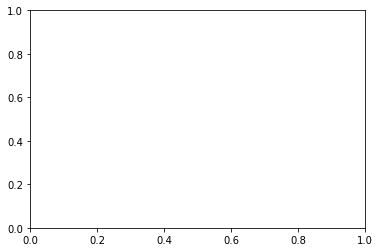

In [29]:
# Compare Algorithms\n",

plt.boxplot(, labels=names)
plt.title('test_balanced_accuracy')
plt.show()

In [28]:
len(results[0]["test_balanced_accuracy"])

10

In [12]:
#splits = np.arange(0, len(results[0]), 1)
from sklearn.metrics import SCORERS
sorted(SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
plt.plot(splits, results[0])
plt.show()

In [ ]:
plt.plot(splits, results[1])
plt.show()